# `Business Understanding`

Train a machine learning model to predict whether a customer is male or female

# `Data Understanding`

## Importation of all necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Read Data

In [3]:
df = pd.read_csv("C:/Users/HP\Desktop/AZUBI/AZUBI WEEKLY ASSIGNMENT/dollar_tree.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
df.shape

(34867, 16)

In [6]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


In [8]:
df.describe(include='object').T 

,count,unique,top,freq
Date,34866,576,3/1/2016,196
Month,34866,12,June,3680
Customer Gender,34866,2,M,17805
Country,34866,4,United States,18076
State,34866,45,California,10332
Product Category,34866,3,Accessories,22534
Sub Category,34866,17,Tires and Tubes,11112


# `Data Preparation`

## Data Cleaning

In [9]:
#Dropping Column1 since it contains null values
df = df.drop('Column1',axis=1)

In [10]:
#Setting index on index column
df =df.set_index('index')

In [11]:
df.head(2)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.0,109.0,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.5,28.5,49.0,57.0


In [12]:
df['Customer Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [13]:
df['Customer Gender'].unique().shape

(3,)

In [14]:
df.dropna()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,3/22/2015,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0


In [15]:
df.corr(numeric_only=True)

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
Year,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361
Customer Age,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836
Quantity,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418
Unit Cost,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957
Unit Price,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034
Cost,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119
Revenue,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000


## Divide data into input and output

In [16]:
df.columns

Index(['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue'],
      dtype='object')

In [17]:
#Defiining Input(X) and output(y) values
X = df[['Product Category','Sub Category','Country']]
y = df['Customer Gender']


In [18]:
X.head(2)

,Product Category,Sub Category,Country
index,,,
0,Accessories,Tires and Tubes,United States
1,Clothing,Gloves,United States


In [19]:
y.info()

<class 'pandas.core.series.Series'>
Index: 34867 entries, 0 to 34866
Series name: Customer Gender
Non-Null Count  Dtype 
--------------  ----- 
34866 non-null  object
dtypes: object(1)
memory usage: 544.8+ KB


In [20]:
# dropping null values in x and y
X = X.dropna()
y = y.dropna()

In [21]:
X.shape

(34866, 3)

In [22]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=42)

In [23]:
X_train.shape

(27892, 3)

In [24]:
y_train.shape

(27892,)

## Encoding

### 1. Encode the target column (the labels)


In [25]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [26]:
y_train_encoded

array([1, 1, 0, ..., 1, 1, 0])

### 2. Encode categorical columns

In [27]:
categorical_columns =['Product Category','Sub Category','Country']

In [28]:
X_train

,Product Category,Sub Category,Country
index,,,
24328,Accessories,Tires and Tubes,United States
5096,Accessories,Bottles and Cages,Germany
14118,Clothing,Jerseys,United States
18429,Accessories,Helmets,United States
17957,Accessories,Helmets,United States
...,...,...,...
16850,Accessories,Tires and Tubes,United States
6265,Accessories,Tires and Tubes,United States
11284,Bikes,Mountain Bikes,United States


In [29]:
#Imported OneHotEncoder
#encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)           
#X_train_encoded = encoder.fit_transform(X_train)
#X_test_encoded = encoder.transform(X_test)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X_train_encoded

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
categorical_columns

['Product Category', 'Sub Category', 'Country']

### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [32]:
#dropping categorical_columns
non_categorical = X_train.drop(categorical_columns,axis =1)

# dropping the categorical columns in the X train
#no_cat = X_train.drop(categorical_columns,axis=1)

In [33]:
non_categorical.shape

(27892, 0)

In [34]:
X_train.shape

(27892, 3)

In [35]:
#Reseting indices to ensure proper alignment when we concatinate
non_categorical.reset_index(drop=True, inplace=True)
X_train_encoded.reset_index(drop=True, inplace=True)

#no_cat.reset_index(drop=True, inplace=True)
#X_train_encoded.reset_index(drop=True, inplace=True)


In [36]:
X_train_encoded.shape

(27892, 24)

In [37]:
y_train_encoded.shape

(27892,)

In [38]:
X_train = pd.concat([non_categorical, X_train_encoded], axis=1)
X_train

# concating the encoded columns with the xtrain

C:\Users\HP\AppData\Local\Temp\ipykernel_7652\3013314228.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_train = pd.concat([non_categorical, X_train_encoded], axis=1)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
# concatenating the xtest with the encoded columns
X_test = pd.concat([non_categorical, X_test_encoded], axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_7652\1963595526.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_test = pd.concat([non_categorical, X_test_encoded], axis=1)


# `Modeling`

In [40]:
# training our model using K-Nearest Neighbors (K-NN) Classifier
# You can adjust the number of neighbors (k) as needed

X_train.columns = X_train.columns.astype(str)
k_model = KNeighborsClassifier(n_neighbors=2) 
#k_model.fit(X_train, y_train)
k_model.fit(X_train,y_train_encoded)

KNeighborsClassifier(n_neighbors=2)

In [41]:
X_test = X_test.dropna()
X_test.columns = X_test.columns.astype(str)

pred = k_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test_encoded, pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


### Build a classification Report

In [43]:
print(classification_report(y_test_encoded, pred))

              precision    recall  f1-score   support

           0       0.49      0.67      0.56      3351
           1       0.53      0.35      0.42      3623

    accuracy                           0.50      6974
   macro avg       0.51      0.51      0.49      6974
weighted avg       0.51      0.50      0.49      6974



# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

<Axes: >

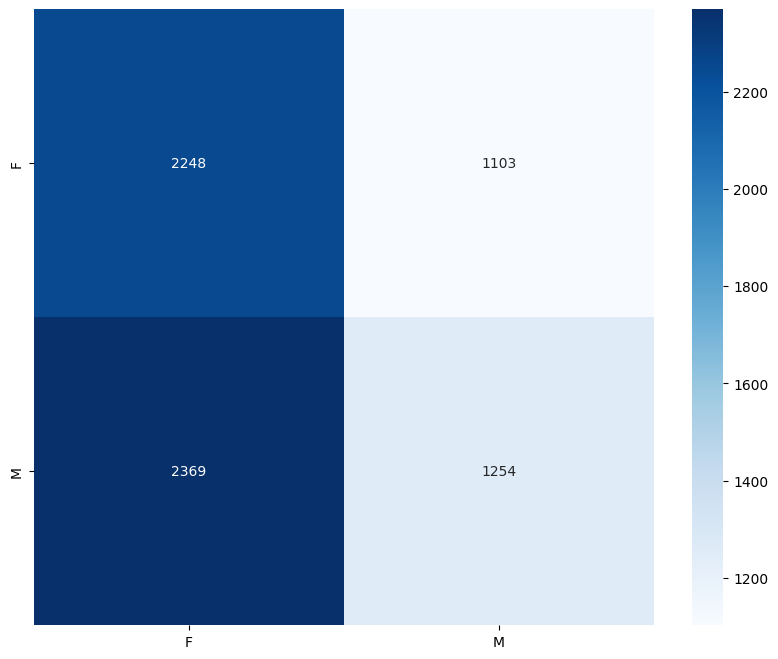

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



matrix = confusion_matrix(y_test_encoded, pred)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, cmap='Blues', annot=True, xticklabels=label_encoder.classes_ , yticklabels=label_encoder.classes_, fmt='d')